What is the National Survey of Children’s Health (NSCH)? The NSCH is a national survey funded and directed by the Health Resources and Services Administration’s Maternal and Child Health Bureau (HRSA MCHB) that provides rich data on multiple, intersecting aspects of children’s health and well-being – including physical and mental health, access to and quality of health care, and the child’s family, neighborhood, school, and social context.

What is the purpose of the National Survey of Children’s Health? The NSCH is designed to produce national and state-level data on the physical and emotional health of children 0 - 17 years old in the United States. Additionally, the NSCH provides estimates for 19 Title V Maternal and Child Health Services Block Grant National Outcome and Performance Measures, and data for each state’s Title V needs assessment.

Who sponsors and conducts the National Survey of Children’s Health? The NSCH is conducted by the U.S. Census Bureau on behalf of the U.S. Department of Health and Human Services, HRSA MCHB. The U.S. Census Bureau oversees the NSCH’s sampling plan and administration by web and mail. They also collect the data and create the sampling weights. Additional funding for specific questions on the 2020 survey was provided by: Centers for Disease Control and Prevention (CDC), National Center on Birth Defects and Developmental Disabilities (NCBDDD), United States Department of Agriculture (USDA), Food and Nutrition Service.

Who were the participants in the National Survey of Children’s Health? Households were randomly sampled and contacted by mail in order to identify those with one or more children under 18 years old. In households with more than one child only one was randomly selected to be the subject of the survey.

The survey oversampled children with special health care needs and children 0-5 years of age. For the 2020 NSCH, a total of 42,777 surveys were completed nationally for children between the ages of 0-17 years. State range 644 to 3,039. The weighted Overall Response Rate was 42.4%. Survey data were weighted to represent the population of non-institutionalized children ages 0-17 who live in housing units nationally and in each state.

How were data for the survey collected?

Households received a mailed invitation asking an adult in the household who is familiar with the child’s health and health care (usually a parent) to complete a short screener questionnaire (via web or paper). The screener asked participants to identify all children ages 0-17 living in the household. If a child (or children) was reported to live in the household, participants who chose to respond online were immediately directed to a more detailed, age-specific topical questionnaire for one randomly selected child. Participants could also request a paper copy of the screener and topical questionnaire if they did not wish to complete it online. The NSCH screener and topical questionnaires were available in both English and in Spanish.

Pre-survey screener: Once information on all children is gathered via the screener, one child from the household is randomly selected. The remaining questions of the survey pertain to this randomly selected child.

What topics are asked about in the survey?

• Child and family demographics • Children’s physical and mental health status, including health conditions and functional difficulties • Health insurance status, adequacy and type of coverage • Access to and use of health care services • Medical home • Transition to adult care • Early childhood-specific information (0-5 years) • Middle childhood and adolescent-specific information (6-17 years) • Family health and activities • Impact of child’s health on family • Parental perceptions of neighborhood and community characteristics

Are data from the NSCH available to the public? • The Data Resource Center for Child and Adolescent Health (DRC) website (www.childhealthdata.org) provides quick, easy, hands-on access to 2020 NSCH survey data. The DRC’s interactive data query (www.childhealthdata.org/browse/survey) allows users to instantly access the data and compare national and state-level findings among children of different ages, race/ethnicity, income levels, health status, and many more subgroups.

Interpretation of results

The respondents to the NSCH are parents or guardians who best know the child’s health. However, the results are weighted to reflect the population of children and youth ages 0–17, not parents or families. Thus, results are reported in terms of children/youth, even if the question refers to the parents or family. For example, when reporting on maternal health status, it is correct to say: “…percentage of children whose mothers are in excellent or very good health,” NOT “…percentage of mothers who are in excellent or very good health….”

Additionally, it is good to keep in mind that the condition-specific information in this survey is based on parent reports, not clinical diagnosis. Height and weight information used to calculate the Body Mass Index (BMI)-for-age indicator is also derived from parent reports, not biometric measurements.

Please pay careful attention to the valid denominator of responders to specific questions when interpreting results for this survey. Although most of the questions were asked for all children ages 0–17, some questions of the survey targeted specific age groups: ages 0–5, 3-5, 6–17, 10-17, and 12-17 years. In several parts of the survey, follow-up questions were asked only if parents gave a specific response to an earlier question.

CodeBook link: https://www.census.gov/data-tools/demo/uccb/nschdict

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import statistics
import numpy as np

In [2]:
# Load the NSCH dataset into a pandas DataFrame
nsch_data = pd.read_csv('2020 NSCH_Topical_CAHMI_DRC_Dataset.csv')

To define a binary variable for the presence or absence of ADHD I use the four variables K2Q31A, K2Q31B, K2Q31C, and K2Q31D
I followed the following steps:

Start with K2Q31A, which asks whether the child has ever been diagnosed with attention-deficit/hyperactivity disorder (ADHD). Create a binary variable called "ADHD_diagnosis" that is coded as 1 if the answer to K2Q31A is "yes" and 0 if the answer is "no".

Next, use K2Q31B to refine the ADHD diagnosis variable based on whether the child currently has ADHD. Create a binary variable called "ADHD_current" that is coded as 1 if the answer to K2Q31B is "yes" and 0 if the answer is "no" or "not sure".

Use K2Q31C to further refine the ADHD variable based on the severity of the child's symptoms. Create a binary variable called "ADHD_severity" that is coded as 1 if the answer to K2Q31C indicates that the child has "moderate" or "severe" ADHD symptoms and 0 if the answer indicates "mild" symptoms or no ADHD.

Finally, use K2Q31D to include information about whether the child is currently taking medication for ADHD. Create a binary variable called "ADHD_medication" that is coded as 1 if the answer to K2Q31D is "yes" and 0 if the answer is "no" or "not sure".

To combine these variables into a single binary variable, you can take the logical OR of each variable, indicating the presence of ADHD if any of the variables are positive. The resulting variable would be coded as 1 if ADHD_diagnosis = 1 OR ADHD_current = 1 OR ADHD_severity = 1 OR ADHD_medication = 1, and 0 otherwise.

Note that this approach assumes that each of the four variables is measuring a distinct aspect of ADHD and that each variable is equally important for defining the presence or absence of ADHD. Depending on your research question and goals, you may need to adjust the definition of the binary variable or use a different approach altogether.

Prevalence of ADD/ADHD, age 3-17 years (ADHDind_20)
Does this child currently have Attention Deficit Disorder (ADD) or Attention-Deficit/Hyperactivity Disorder (ADHD), age 3-17 years?


Survey instrument item number for children 0-5 years: A30; for children 6-11 years: A30; for children 12-17 years: A30
Variable in public use data file:
K2Q31A; K2Q31B


This measure is derived from responses to two questions: 
whether parents were ever told by a health care provider that the child has Attention Deficit Disorder/Attention Deficit Hyperactivity Disorder (ADD/ADHD) (K2Q31A); and, if the response to the previous question is "Yes", whether the child currently has the condition (K2Q31B). Respondents were grouped according to whether they currently have ADD/ADHD.


COMPUTE ADHDind_20= 999.

IF K2Q31A = 2 ADHDind_20= 1.
IF K2Q31A = 1 and K2Q31B = 2 ADHDind_20= 2.
IF K2Q31A = 1 and K2Q31B = 1 ADHDind_20= 3.
IF K2Q31A=99 or K2Q31B=99 ADHDind_20= 99.
IF SC_AGE_YEARS < 3 ADHDind_20= 95.
VARIABLE LABELS ADHDind_20 "Indicator 2.7: Children who currently have Attention Deficit Disorder (ADD) or Attention-Deficit Hyperactivity Disorder (ADHD), age 3-17 years".
VALUE LABELS ADHDind_20
1 "Does not currently have condition"
2 "Ever told, but does not currently have condition"
3 "Currently has condition"
99 "Missing"
95 "Children age 0-2 years".
MISSING VALUES ADHDind_20(95,99).

#This measure was derived based on 10 conditions (Tourette Syndrome (3-17 years), anxiety problems (3-17 years), depression (3-17 years), behavioral and conduct problem (3-17 years), developmental delay (3-17 years), intellectual disability (3-17 years), speech or other language disorder (3-17 years), learning disability (also known as mental retardation) (3-17 years), Autism or Autism Spectrum Disorder (ASD) (3-17 years), Attention Deficit Disorder or Attention-Deficit/Hyperactivity Disorder (ADD or ADHD) (3-17 years) and the CSHCN Screener questions on mental, emotional and behavioral problems. To qualify as having a mental, emotional, developmental or behavioral problem, the child must have any of 10 conditions currently and/or qualify on the CSHCN Screener ongoing emotional, developmental or behavioral conditions criteria.
Please note that in the NSCH, all information about children's health conditions is based on parent recollection and is not independently verified.

1 "Child has 1 or more MEDB problems, and/or qualifies on CSHCN Screener emotional, behavioral or developmental criteria"
2 "Child does not currently have mental, emotional, developmental, or behavioral problems"
95 "Children age 0-2 years"
99 "Missing to all".

In [3]:
print(nsch_data['ADHDind_20'])

0         1
1         1
2        95
3         1
4         1
         ..
42772     3
42773     1
42774     3
42775     1
42776     3
Name: ADHDind_20, Length: 42777, dtype: int64


In [4]:
nsch_data["ADHDind_20"].value_counts()

1     32940
95     5377
3      3880
2       319
99      261
Name: ADHDind_20, dtype: int64

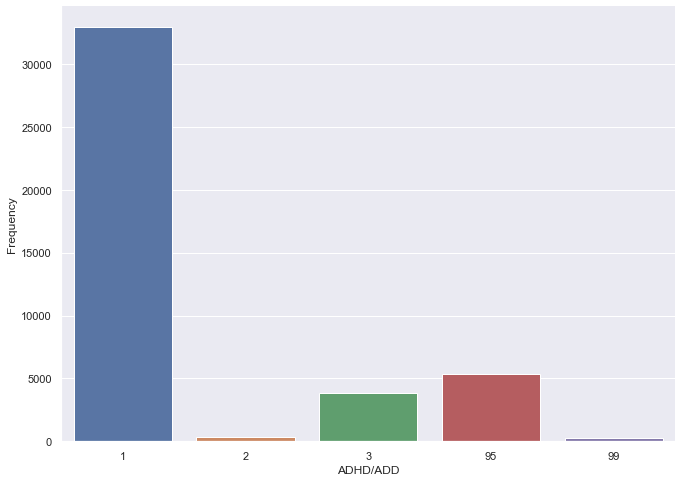

In [5]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=nsch_data,
              x='ADHDind_20')
plt.xlabel('ADHD/ADD')
plt.ylabel('Frequency')
plt.title('')
sns.despine()
plt.show()

In [6]:
# create a new binary variable for ADHD
nsch_data["ADHD_binary"] = nsch_data["ADHDind_20"].replace({1: 0, 2: 0, 3: 1})

# drop missing values
nsch_data = nsch_data[(nsch_data["ADHDind_20"] != 95) & (nsch_data["ADHDind_20"] != 99)]

# check the value counts for the new binary variable
print(nsch_data["ADHD_binary"].value_counts())

0    33259
1     3880
Name: ADHD_binary, dtype: int64


In [7]:


df = nsch_data[['ADHD_binary','BrstStop_20','MOMAGE','FIPSST','TOTKIDS_R', 'SC_AGE_YEARS', 'SC_SEX', 'race4_20', 'AdultEduc_20', 'povlev4_20', 'PrntNativity_20', 'HHLanguage_20', 'instype_20']]



In [8]:
nsch_data['AdultEduc_20'].value_counts()

4    22596
3     8519
2     5008
1     1016
Name: AdultEduc_20, dtype: int64

In [9]:
#MOMAGE:Age of mother when child was born
#SC_AGE_YEARS:Age of selected child
#FIPSST:State of Residence

nsch_data['MOMAGE']


0        26
1        31
3        29
4        24
5        24
         ..
42772    21
42773    38
42774    39
42775    30
42776    27
Name: MOMAGE, Length: 37139, dtype: int64

In [10]:
#Impute Mom Age missing coded as 99 with the median
nsch_data['MOMAGE'].value_counts()

30    2656
32    2494
29    2241
34    2152
31    2125
28    2080
35    2069
33    2067
27    1874
26    1690
25    1641
36    1603
24    1293
38    1163
37    1161
23    1157
22     913
39     912
18     875
21     863
99     839
20     786
40     729
19     612
41     392
42     313
43     163
45     154
44     122
Name: MOMAGE, dtype: int64

In [11]:
momage_median = nsch_data.loc[nsch_data['MOMAGE'] != 99, 'MOMAGE'].median()

In [12]:
nsch_data['MOMAGE'].replace(99, momage_median, inplace= True)

In [13]:



df = nsch_data[['MEDB10ScrQ5_20','MOMAGE','FIPSST','TOTKIDS_R', 'SC_AGE_YEARS', 'SC_SEX', 'race4_20','AdultEduc_20', 'povlev4_20', 'PrntNativity_20', 'HHLanguage_20', 'instype_20', 'BedTime_20']]







In [14]:
#Child goes to bed same time on weeknights (BedTime_20)
"""How often does this child go to bed at about the same time on weeknights?
1 "Always"
2 "Usually"
3 "Sometimes"
4 "Rarely or never"
99 "Missing"."""
nsch_data['BedTime_20'].value_counts()

2     21757
1      9348
3      3916
4      1648
99      470
Name: BedTime_20, dtype: int64

In [15]:
# Imputing the 99 values in "BedTime_20" with median.
BedTime_20_median = nsch_data.loc[nsch_data['BedTime_20'] != 99, 'BedTime_20'].median()
nsch_data['BedTime_20'].replace(99, BedTime_20_median, inplace= True)

In [16]:
#Type of health insurance (InsType_20):
"""What type of health insurance coverage, if any, did the child have at the time of the survey?
1 "Public health insurance only"
2 "Private health insurance only"
3 "Public and private insurance"
4 "Uninsured"
99 "Missing"."""

nsch_data['instype_20'].value_counts()




2     25581
1      7673
4      1850
3      1497
99      538
Name: instype_20, dtype: int64

In [17]:
# Imputing the 99 values in "instype_20_median" with median.
instype_20_median = nsch_data.loc[nsch_data['instype_20'] != 99, 'instype_20'].median()
nsch_data['instype_20'].replace(99, instype_20_median, inplace= True)

In [18]:
#Primary household language (HHLanguage_20)
"""1 "English"
2 "Other than English"
99 "Missing"."""

nsch_data['HHLanguage_20'].value_counts()

1     34383
2      2625
99      131
Name: HHLanguage_20, dtype: int64

In [19]:
# Imputing the 99 values in "HHLanguage_20" with median.
HHLanguage_20_median = nsch_data.loc[nsch_data['HHLanguage_20'] != 99, 'HHLanguage_20'].median()
nsch_data['HHLanguage_20'].replace(99, HHLanguage_20_median, inplace= True)

In [20]:
"""PrntNativity_20 "Generational status of the parents".1 "All parents born in the U.S. (3rd or higher generation HH)"
2 "Any parent born outside of the U.S. (1st and 2nd generation HH)"
3 "Other (child born in United States, parents are not listed)"
99 "Missing"."""

nsch_data['PrntNativity_20'].value_counts()

1     28010
2      6547
3      1945
99      637
Name: PrntNativity_20, dtype: int64

In [21]:
# Imputing the 99 values in "PrntNativity_20" with median.
PrntNativity_20_median = nsch_data.loc[nsch_data['PrntNativity_20'] != 99, 'PrntNativity_20'].median()
nsch_data['PrntNativity_20'].replace(99, PrntNativity_20_median, inplace= True)

In [22]:
#We droped this columns bacouse of 1175 missing values.
nsch_data['FAMCOUNT'].value_counts()

4     13765
3     10528
5      6174
2      2778
6      2059
99     1150
7       454
8       200
1        31
Name: FAMCOUNT, dtype: int64

In [23]:
#We droped this columns bacouse of 991 missing values.
"""Family structure of child's household (famstruct5_20)
1 "Two parents, currently married"
2 "Two parents, not currently married"
3 "Single parent (mother or father)"
4 "Grandparent household"
5 "Other family type"""
nsch_data['famstruct5_20'].value_counts()

1     24934
3      7908
2      1941
4      1046
99      973
5       337
Name: famstruct5_20, dtype: int64

In [24]:
"""povlev4_20 "Income based on federal poverty level status".
1 "0-99% FPL"
2 "100-199% FPL"
3 "200-399% FPL"
4 "400% FPL or greater"."""
nsch_data['povlev4_20'].value_counts()

4    14941
3    11287
2     6293
1     4618
Name: povlev4_20, dtype: int64

In [25]:
"""What is the highest education of adult in this child's household? 1 "Less than high school"
2 "High school or GED"
3 "Some college or technical school"
4 "College degree or higher"""
nsch_data['AdultEduc_20'].value_counts()

4    22596
3     8519
2     5008
1     1016
Name: AdultEduc_20, dtype: int64

In [26]:
'''TOTKIDS_R = Number of children living in the household(1 = 1; 2 = 2; 3 = 3; 4 = 4+)'''
nsch_data['TOTKIDS_R'].value_counts()

1    15103
2    14834
3     5062
4     2140
Name: TOTKIDS_R, dtype: int64

In [27]:
'''SC_SEX = 1 "Male"; 2 "Female"'''
nsch_data['SC_SEX'].value_counts()

1    19153
2    17986
Name: SC_SEX, dtype: int64

In [28]:
"""Race and ethnicity distribution of the child population
1 "Hispanic"
2 "White, non-Hispanic"
3 "Black, non-Hispanic"
4 "Other/Multi-racial, non-Hispanic"""
nsch_data['race4_20'].value_counts()

2    24563
4     4988
1     4988
3     2600
Name: race4_20, dtype: int64

In [29]:



df = nsch_data[['ADHD_binary','MOMAGE','FIPSST','TOTKIDS_R', 'SC_AGE_YEARS', 'SC_SEX', 'race4_20','AdultEduc_20', 'povlev4_20', 'PrntNativity_20', 'HHLanguage_20', 'instype_20', 'BedTime_20']]


In [30]:
categorical_columns_name= ['FIPSST','SC_SEX', 'race4_20', 'AdultEduc_20', 'povlev4_20', 'PrntNativity_20',
       'HHLanguage_20', 'instype_20', 'BedTime_20']

In [31]:

df[categorical_columns_name]= df[categorical_columns_name].astype('category')


/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_7850/173968123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_columns_name]= df[categorical_columns_name].astype('category')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37139 entries, 0 to 42776
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ADHD_binary      37139 non-null  int64   
 1   MOMAGE           37139 non-null  int64   
 2   FIPSST           37139 non-null  category
 3   TOTKIDS_R        37139 non-null  int64   
 4   SC_AGE_YEARS     37139 non-null  int64   
 5   SC_SEX           37139 non-null  category
 6   race4_20         37139 non-null  category
 7   AdultEduc_20     37139 non-null  category
 8   povlev4_20       37139 non-null  category
 9   PrntNativity_20  37139 non-null  category
 10  HHLanguage_20    37139 non-null  category
 11  instype_20       37139 non-null  category
 12  BedTime_20       37139 non-null  category
dtypes: category(9), int64(4)
memory usage: 1.7 MB


In [33]:
df.columns

Index(['ADHD_binary', 'MOMAGE', 'FIPSST', 'TOTKIDS_R', 'SC_AGE_YEARS',
       'SC_SEX', 'race4_20', 'AdultEduc_20', 'povlev4_20', 'PrntNativity_20',
       'HHLanguage_20', 'instype_20', 'BedTime_20'],
      dtype='object')

In [34]:
# Creating get dummies for categorical comments
new_df = pd.get_dummies(df[categorical_columns_name])

In [35]:
# create dummy variables for categorical columns

df= pd.concat([df, new_df], axis=1)

In [36]:
# drop the original categorical columns
df.drop(categorical_columns_name, axis=1, inplace=True)



In [37]:
df.head()

,ADHD_binary,MOMAGE,TOTKIDS_R,SC_AGE_YEARS,FIPSST_1,FIPSST_2,FIPSST_4,FIPSST_5,FIPSST_6,FIPSST_8,...,HHLanguage_20_1,HHLanguage_20_2,instype_20_1,instype_20_2,instype_20_3,instype_20_4,BedTime_20_1,BedTime_20_2,BedTime_20_3,BedTime_20_4
0,0,26,2,3,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,0,31,1,14,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,29,2,15,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0,24,2,16,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5,0,24,3,17,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


<AxesSubplot:>

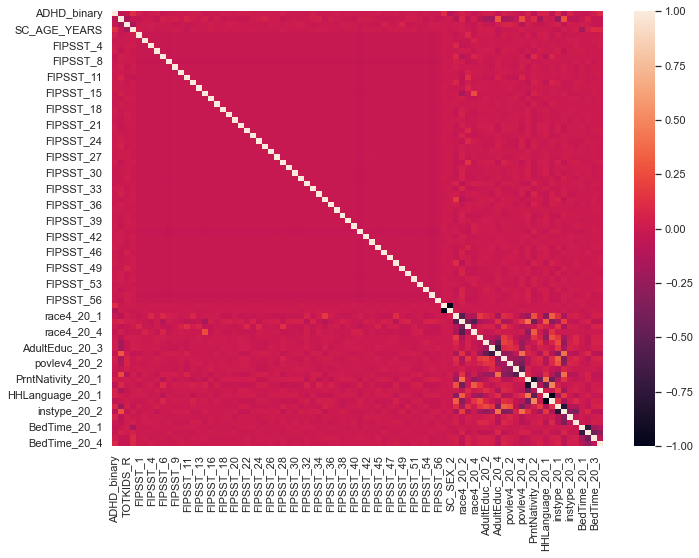

In [38]:
sns.heatmap(df.corr())


In [39]:
#We scaled Momage and child age coloums. 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['MOMAGE', 'SC_AGE_YEARS']] = sc.fit_transform(df[['MOMAGE', 'SC_AGE_YEARS']])

In [40]:
df.head()

,ADHD_binary,MOMAGE,TOTKIDS_R,SC_AGE_YEARS,FIPSST_1,FIPSST_2,FIPSST_4,FIPSST_5,FIPSST_6,FIPSST_8,...,HHLanguage_20_1,HHLanguage_20_2,instype_20_1,instype_20_2,instype_20_3,instype_20_4,BedTime_20_1,BedTime_20_2,BedTime_20_3,BedTime_20_4
0,0,-0.721421,2,-1.720848,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,0,0.145286,1,0.765734,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,-0.201397,2,0.991787,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0,-1.068103,2,1.217839,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5,0,-1.068103,3,1.443892,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [41]:
y = df["ADHD_binary"]

X = df.drop(['ADHD_binary'], axis = 1)


In [42]:
len(X)

37139

In [43]:
len(y)

37139

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import sklearn

In [45]:
X


,MOMAGE,TOTKIDS_R,SC_AGE_YEARS,FIPSST_1,FIPSST_2,FIPSST_4,FIPSST_5,FIPSST_6,FIPSST_8,FIPSST_9,...,HHLanguage_20_1,HHLanguage_20_2,instype_20_1,instype_20_2,instype_20_3,instype_20_4,BedTime_20_1,BedTime_20_2,BedTime_20_3,BedTime_20_4
0,-0.721421,2,-1.720848,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,0.145286,1,0.765734,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,-0.201397,2,0.991787,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,-1.068103,2,1.217839,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5,-1.068103,3,1.443892,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42772,-1.588127,4,0.539681,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
42773,1.358675,1,-0.816637,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
42774,1.532016,1,0.765734,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
42775,-0.028056,1,-0.138478,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [46]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.50, random_state=123)

<AxesSubplot:>

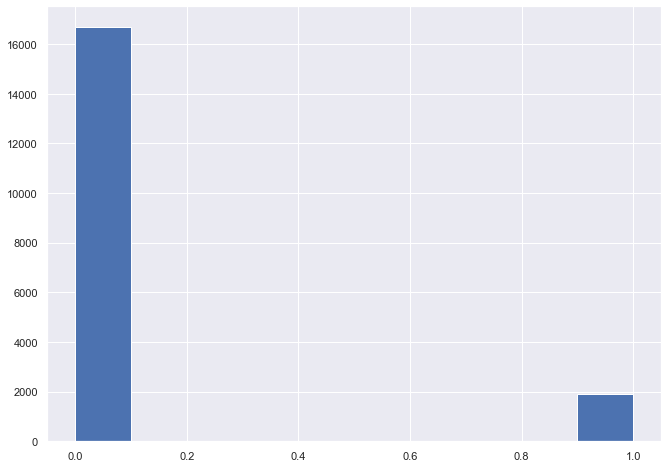

In [47]:
y_test.hist()


Feature: 0, Score: 0.00291
Feature: 1, Score: 0.00299
Feature: 2, Score: 0.00302
Feature: 3, Score: 0.00353
Feature: 4, Score: 0.00423
Feature: 5, Score: 0.00434
Feature: 6, Score: 0.00435
Feature: 7, Score: 0.00451
Feature: 8, Score: 0.00467
Feature: 9, Score: 0.00469
Feature: 10, Score: 0.00471
Feature: 11, Score: 0.00473
Feature: 12, Score: 0.00474
Feature: 13, Score: 0.00486
Feature: 14, Score: 0.00502
Feature: 15, Score: 0.00502
Feature: 16, Score: 0.00508
Feature: 17, Score: 0.00532
Feature: 18, Score: 0.00537
Feature: 19, Score: 0.00540
Feature: 20, Score: 0.00541
Feature: 21, Score: 0.00547
Feature: 22, Score: 0.00552
Feature: 23, Score: 0.00556
Feature: 24, Score: 0.00557
Feature: 25, Score: 0.00572
Feature: 26, Score: 0.00574
Feature: 27, Score: 0.00580
Feature: 28, Score: 0.00590
Feature: 29, Score: 0.00591
Feature: 30, Score: 0.00602
Feature: 31, Score: 0.00605
Feature: 32, Score: 0.00612
Feature: 33, Score: 0.00613
Feature: 34, Score: 0.00615
Feature: 35, Score: 0.00620
Fe

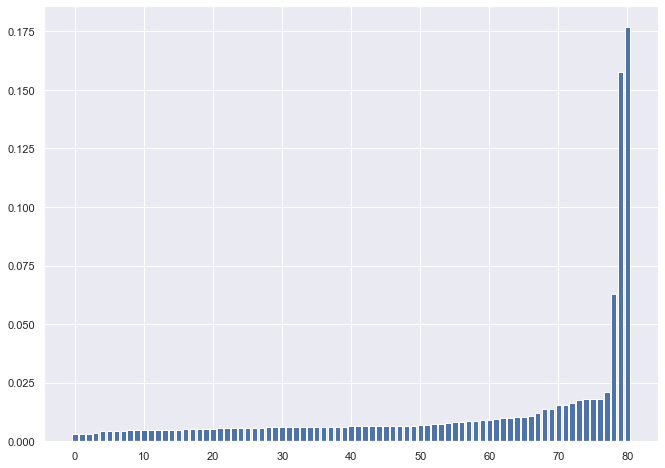

In [48]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(sorted(importance)):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], sorted(importance))
pyplot.show()

In [49]:
a={}
X_col = X.columns
for i,v in enumerate(importance):
    a[X_col[i]]= v

In [50]:
sorted_featureImportance = {k: v for k, v in sorted(a.items(), key=lambda item: item[1]) if v>0.005}
sorted_featureImportance

{'FIPSST_11': 0.005018499445970053,
 'FIPSST_17': 0.005018957275171343,
 'FIPSST_29': 0.005084556921345815,
 'FIPSST_44': 0.005321481061661812,
 'FIPSST_46': 0.005371934965548998,
 'FIPSST_16': 0.0053977035732300305,
 'instype_20_4': 0.005411666936740864,
 'FIPSST_20': 0.005465699941955796,
 'FIPSST_38': 0.005523182255371007,
 'FIPSST_19': 0.0055608146452089365,
 'FIPSST_42': 0.005573526244477754,
 'FIPSST_9': 0.005724441640611164,
 'FIPSST_25': 0.005739591885197083,
 'FIPSST_39': 0.00580261936609617,
 'FIPSST_47': 0.005898445420513729,
 'FIPSST_54': 0.005905172935731396,
 'FIPSST_26': 0.006022829137061906,
 'FIPSST_13': 0.00604640146775131,
 'FIPSST_51': 0.006117263854782865,
 'FIPSST_36': 0.0061277621939605864,
 'FIPSST_24': 0.006151415618788608,
 'FIPSST_23': 0.0062000310185265405,
 'FIPSST_50': 0.006200826808585299,
 'FIPSST_31': 0.006213813919380449,
 'FIPSST_4': 0.006217224782762864,
 'FIPSST_40': 0.006270004910871262,
 'PrntNativity_20_3': 0.0064078568976724285,
 'FIPSST_28': 0.

<AxesSubplot:>

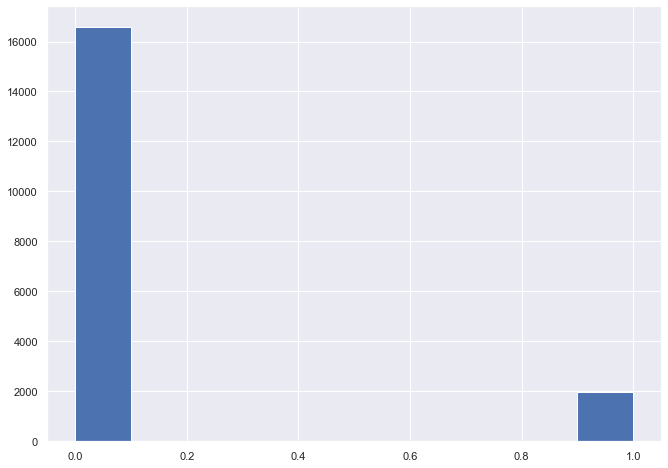

In [51]:
y_train.hist()

In [52]:
logreg_clf = LogisticRegression(max_iter=10000)

In [53]:
logreg_clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [54]:
pred=logreg_clf.predict(X_test)

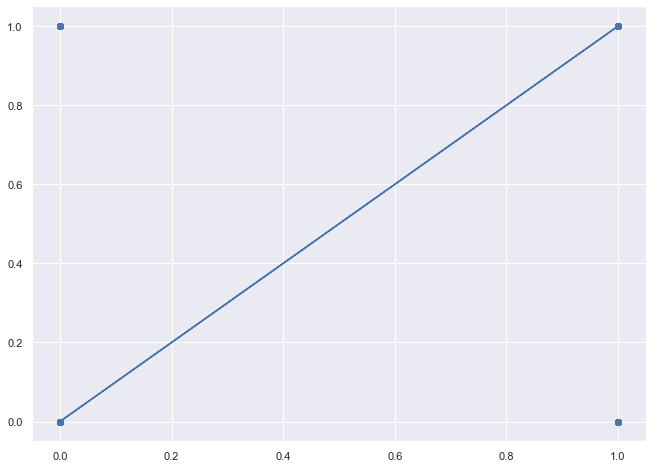

In [55]:
plt.scatter(y_test, pred)
plt.plot(y_test, y_test)

In [56]:
print(accuracy_score(pred, y_test))

0.8980613893376413


In [57]:
print(confusion_matrix(pred, y_test))

[[16656  1866]
 [   27    21]]


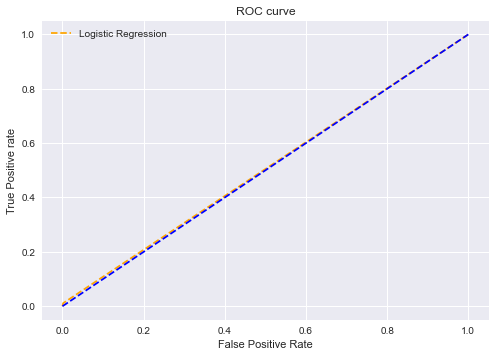

In [58]:
#computing AUROC

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# matplotlib

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [59]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [60]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
pred=KNN_model.predict(X_test)

In [62]:
print(accuracy_score(pred, y_test))

0.8875605815831987


In [63]:
print(confusion_matrix(pred, y_test))

[[16374  1779]
 [  309   108]]


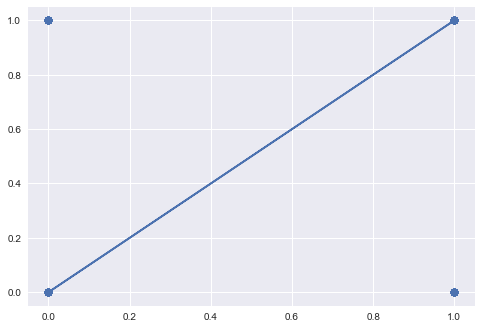

In [64]:
plt.scatter(y_test, pred)
plt.plot(y_test, y_test)

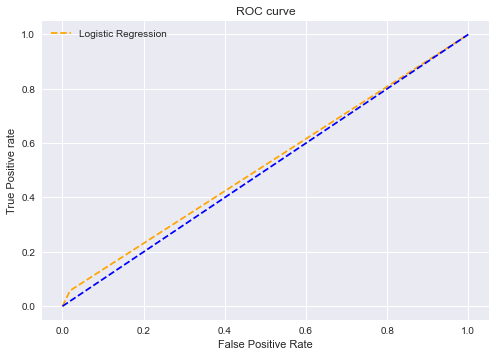

In [65]:
#computing AUROC

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# matplotlib

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [66]:
SVC_model= SVC()
SVC_model.fit(X_train,y_train)
pred=SVC_model.predict(X_test)
print(accuracy_score(pred, y_test))

0.8983844911147011


In [67]:
print(confusion_matrix(pred, y_test))

[[16683  1887]
 [    0     0]]


In [68]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))

0.8980613893376413
[[16667  1877]
 [   16    10]]


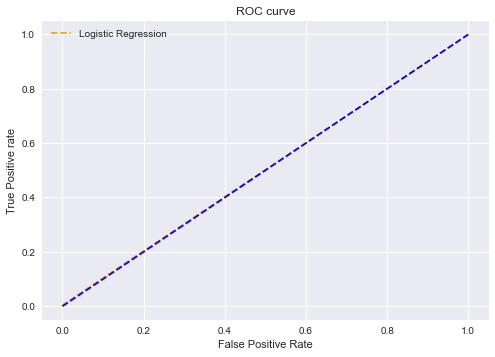

In [69]:
#computing AUROC

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# matplotlib

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [70]:
X_important_train= X_train[sorted_featureImportance.keys()]
X_important_test = X_test[sorted_featureImportance.keys()]

In [71]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_important_train, y_train)
pred=clf.predict(X_important_test)
print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))

0.8982229402261712
[[16675  1882]
 [    8     5]]


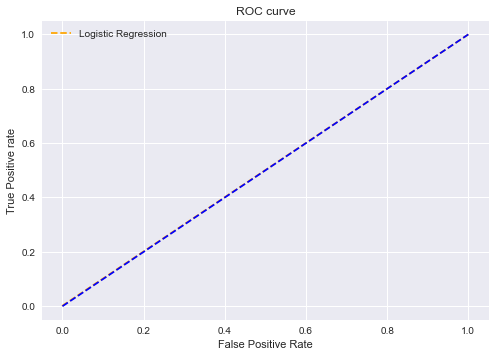

In [72]:
#computing AUROC

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# matplotlib

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [73]:
#In order to improve the model, we used PCA Analysis to reduce dimention of X
y = df["ADHD_binary"]

X = df.drop(['ADHD_binary'], axis = 1)


In [74]:

import numpy as np
from sklearn.decomposition import PCA, KernelPCA
pca = KernelPCA(n_components=10, kernel = 'linear')
X = pca.fit_transform(X)
X

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.50, random_state=123)

In [158]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))

0.8954227248249865
[[16602  1861]
 [   81    26]]


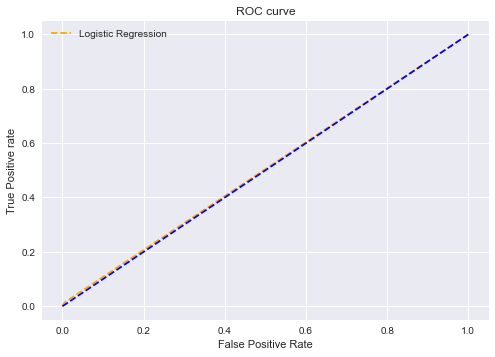

In [159]:
#computing AUROC

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# matplotlib

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();